In [ ]:
import numpy as np
import pandas as pd
import os
import os, cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import dct

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/BreaKHis 400Xdata/BreaKHis 400X/train

/content/drive/MyDrive/BreaKHis 400Xdata/BreaKHis 400X/train


Load and Check data

In [ ]:
img_list = []
for i in os.listdir('benign'):
    image = cv.imread('benign/'+ str(i))
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx,mny:mxy,:]
    crop_img_r = cv.resize(crop_img, (224,224))
    img_list.append(crop_img_r)

In [ ]:
for i in os.listdir('malignant'):
    image = cv.imread('malignant/'+ str(i))
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx,mny:mxy,:]
    crop_img_r = cv.resize(crop_img, (224,224))
    img_list.append(crop_img_r)

In [ ]:
len(img_list)

1000

Feature extraction RESNET 50

In [ ]:
from tensorflow.keras.applications import ResNet50, ResNet101
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
def feature_extract(model):
    if model == "VGG19": model = VGG19(weights='imagenet',include_top=False, pooling="avg")
    elif model == "ResNet50": model = ResNet50(weights='imagenet',include_top=False,pooling="avg")
    elif model == "ResNet101": model = ResNet101(weights='imagenet',include_top=False,pooling="avg")
    return model

In [ ]:
model = feature_extract("ResNet50") # or "VGG19", "ResNet101"

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
features_list = []
for i in range(len(img_list)):

    image = img_list[i].reshape(-1, 224, 224, 3)
    image = preprocess_input(image)

    """
    # Reshaping when VGG19 model is selected
    features = model.predict(image).reshape(512,)
    """

    #Reshaping  when ResNet50 or ResNet101 model is selected
    features = model.predict(image).reshape(2048,)

    features_list.append(features)


1/1 [==============================] - 0s 189ms/step


In [ ]:
features_df = pd.DataFrame(features_list)


In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.398358,0.021645,0.011986,0.227548,1.087317,0.000000,0.000000,0.294783,0.531766,0.000000,...,0.660734,0.008357,0.058958,0.076782,0.0,0.000000,0.0,2.558176,0.770583,0.026370
1,0.589428,1.533590,0.000000,0.071903,0.063234,0.139139,0.039146,0.000000,0.035749,0.056614,...,0.105317,0.159151,0.020690,0.169922,0.0,0.038343,0.0,0.519988,0.267357,0.063179
2,0.829368,0.089760,0.000000,0.000000,0.014988,0.149409,0.028525,0.000000,0.003045,0.000000,...,0.180089,0.000000,0.058554,0.302928,0.0,0.014149,0.0,0.714185,0.520126,0.000000
3,3.361253,0.872309,0.000000,0.000000,0.278592,0.029063,0.143000,0.000000,0.000000,0.004725,...,0.051808,0.480083,0.232862,0.008839,0.0,0.000000,0.0,0.000000,0.064011,0.000000
4,0.660992,0.385304,0.003803,0.057915,0.639342,0.000000,0.114472,0.000000,0.160751,0.105855,...,0.017130,0.006513,0.035878,0.267383,0.0,0.000000,0.0,0.017486,0.153790,0.002771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.782142,0.011198,0.005867,0.000000,0.509250,0.039532,0.000000,0.019431,0.000000,0.005127,...,0.048012,0.044011,0.001834,0.150590,0.0,0.000000,0.0,0.126973,0.040190,0.212112
996,2.618917,0.591985,0.000000,0.026602,1.162051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.277000,0.049915,0.000000,0.008193,0.0,0.000000,0.0,0.001889,0.256903,0.000000
997,1.076841,0.154343,0.000000,0.004535,0.277295,0.008899,0.005306,0.000000,0.000000,0.031057,...,0.000000,0.000000,0.146420,0.310519,0.0,0.000000,0.0,0.171965,0.000000,0.060797
998,0.646449,0.143997,0.000000,0.000000,0.682038,0.102744,0.000000,0.052977,0.081592,0.000000,...,0.055483,0.001377,0.000000,0.209213,0.0,0.000000,0.0,0.000000,0.020832,0.016510


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.398358,0.021645,0.011986,0.227548,1.087317,0.000000,0.000000,0.294783,0.531766,0.000000,...,0.660734,0.008357,0.058958,0.076782,0.0,0.000000,0.0,2.558176,0.770583,0.026370
1,0.589428,1.533590,0.000000,0.071903,0.063234,0.139139,0.039146,0.000000,0.035749,0.056614,...,0.105317,0.159151,0.020690,0.169922,0.0,0.038343,0.0,0.519988,0.267357,0.063179
2,0.829368,0.089760,0.000000,0.000000,0.014988,0.149409,0.028525,0.000000,0.003045,0.000000,...,0.180089,0.000000,0.058554,0.302928,0.0,0.014149,0.0,0.714185,0.520126,0.000000
3,3.361253,0.872309,0.000000,0.000000,0.278592,0.029063,0.143000,0.000000,0.000000,0.004725,...,0.051808,0.480083,0.232862,0.008839,0.0,0.000000,0.0,0.000000,0.064011,0.000000
4,0.660992,0.385304,0.003803,0.057915,0.639342,0.000000,0.114472,0.000000,0.160751,0.105855,...,0.017130,0.006513,0.035878,0.267383,0.0,0.000000,0.0,0.017486,0.153790,0.002771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.782142,0.011198,0.005867,0.000000,0.509250,0.039532,0.000000,0.019431,0.000000,0.005127,...,0.048012,0.044011,0.001834,0.150590,0.0,0.000000,0.0,0.126973,0.040190,0.212112
996,2.618917,0.591985,0.000000,0.026602,1.162051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.277000,0.049915,0.000000,0.008193,0.0,0.000000,0.0,0.001889,0.256903,0.000000
997,1.076841,0.154343,0.000000,0.004535,0.277295,0.008899,0.005306,0.000000,0.000000,0.031057,...,0.000000,0.000000,0.146420,0.310519,0.0,0.000000,0.0,0.171965,0.000000,0.060797
998,0.646449,0.143997,0.000000,0.000000,0.682038,0.102744,0.000000,0.052977,0.081592,0.000000,...,0.055483,0.001377,0.000000,0.209213,0.0,0.000000,0.0,0.000000,0.020832,0.016510


In [ ]:
df=pd.DataFrame(features_df)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.398358,0.021645,0.011986,0.227548,1.087317,0.000000,0.000000,0.294783,0.531766,0.000000,...,0.660734,0.008357,0.058958,0.076782,0.0,0.000000,0.0,2.558176,0.770583,0.026370
1,0.589428,1.533590,0.000000,0.071903,0.063234,0.139139,0.039146,0.000000,0.035749,0.056614,...,0.105317,0.159151,0.020690,0.169922,0.0,0.038343,0.0,0.519988,0.267357,0.063179
2,0.829368,0.089760,0.000000,0.000000,0.014988,0.149409,0.028525,0.000000,0.003045,0.000000,...,0.180089,0.000000,0.058554,0.302928,0.0,0.014149,0.0,0.714185,0.520126,0.000000
3,3.361253,0.872309,0.000000,0.000000,0.278592,0.029063,0.143000,0.000000,0.000000,0.004725,...,0.051808,0.480083,0.232862,0.008839,0.0,0.000000,0.0,0.000000,0.064011,0.000000
4,0.660992,0.385304,0.003803,0.057915,0.639342,0.000000,0.114472,0.000000,0.160751,0.105855,...,0.017130,0.006513,0.035878,0.267383,0.0,0.000000,0.0,0.017486,0.153790,0.002771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.782142,0.011198,0.005867,0.000000,0.509250,0.039532,0.000000,0.019431,0.000000,0.005127,...,0.048012,0.044011,0.001834,0.150590,0.0,0.000000,0.0,0.126973,0.040190,0.212112
996,2.618917,0.591985,0.000000,0.026602,1.162051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.277000,0.049915,0.000000,0.008193,0.0,0.000000,0.0,0.001889,0.256903,0.000000
997,1.076841,0.154343,0.000000,0.004535,0.277295,0.008899,0.005306,0.000000,0.000000,0.031057,...,0.000000,0.000000,0.146420,0.310519,0.0,0.000000,0.0,0.171965,0.000000,0.060797
998,0.646449,0.143997,0.000000,0.000000,0.682038,0.102744,0.000000,0.052977,0.081592,0.000000,...,0.055483,0.001377,0.000000,0.209213,0.0,0.000000,0.0,0.000000,0.020832,0.016510


In [ ]:
df.to_excel('/content/drive/MyDrive/BreaKHis 400Xdata/BreaKHis 400X/train/featureextractedvgg.xlsx', index=False)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BreaKHis 400Xdata/BreaKHis 400X/train/featureextractedvgg.xlsx')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Label
0,2.398358,0.021645,0.011986,0.227548,1.087317,0.000000,0.000000,0.294783,0.531766,0.000000,...,0.008357,0.058958,0.076782,0.0,0.000000,0.0,2.558176,0.770583,0.026370,0
1,0.589428,1.533590,0.000000,0.071903,0.063234,0.139139,0.039146,0.000000,0.035749,0.056614,...,0.159151,0.020690,0.169922,0.0,0.038343,0.0,0.519988,0.267357,0.063179,0
2,0.829368,0.089760,0.000000,0.000000,0.014988,0.149409,0.028525,0.000000,0.003045,0.000000,...,0.000000,0.058554,0.302928,0.0,0.014149,0.0,0.714185,0.520126,0.000000,0
3,3.361253,0.872309,0.000000,0.000000,0.278592,0.029063,0.143000,0.000000,0.000000,0.004725,...,0.480083,0.232862,0.008839,0.0,0.000000,0.0,0.000000,0.064011,0.000000,0
4,0.660992,0.385304,0.003803,0.057915,0.639342,0.000000,0.114472,0.000000,0.160751,0.105855,...,0.006513,0.035878,0.267383,0.0,0.000000,0.0,0.017486,0.153790,0.002771,0


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Label
995,0.782142,0.011198,0.005867,0.000000,0.509250,0.039532,0.000000,0.019431,0.000000,0.005127,...,0.044011,0.001834,0.150590,0.0,0.0,0.0,0.126973,0.040190,0.212112,1
996,2.618917,0.591985,0.000000,0.026602,1.162051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.049915,0.000000,0.008193,0.0,0.0,0.0,0.001889,0.256903,0.000000,1
997,1.076841,0.154343,0.000000,0.004535,0.277295,0.008899,0.005306,0.000000,0.000000,0.031057,...,0.000000,0.146420,0.310519,0.0,0.0,0.0,0.171965,0.000000,0.060797,1
998,0.646449,0.143997,0.000000,0.000000,0.682038,0.102744,0.000000,0.052977,0.081592,0.000000,...,0.001377,0.000000,0.209213,0.0,0.0,0.0,0.000000,0.020832,0.016510,1
999,0.427017,0.212649,0.156529,0.000000,0.761727,0.022307,0.000000,0.082462,0.030775,0.009595,...,0.028511,0.000781,0.140497,0.0,0.0,0.0,1.263561,0.409809,0.000000,1


In [ ]:
x = df.drop(['Label'], axis = 1)
y = df.loc[:,"Label"].values

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Classification with ML Algorithms

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

Decision tree

In [ ]:
from sklearn import tree
nb_model = tree.DecisionTreeClassifier()
nb_model.fit(x_train, y_train)
predicted = nb_model.predict(x_test)
score = nb_model.score(x_test, y_test)
nb_score_ = np.mean(score)
print('Accuracy : %.3f' % (nb_score_))

Accuracy : 0.745


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, predicted))

from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, predicted, average='macro'))

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, predicted))

precision : 0.765
recall : 0.743
f1-score: 0.754
weighted f1-score: 0.745
0.4897103503529171
0.5933091879527259
0.48948948948948956
precision : 0.765
recall : 0.743
f1-score: 0.754
weighted f1-score: 0.745
0.4897103503529171
0.5933091879527259
0.48948948948948956


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=10))
model.add(Dense(units=1, activation='sigmoid'))

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


KNN

In [ ]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_ = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
score = knn.score(x_test, y_test)
knn_score_ = np.mean(score)

print('Accuracy : %.3f' % (knn_score_))

Accuracy : 0.945


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, predicted))

from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, predicted, average='macro'))

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, predicted))

precision : 0.961
recall : 0.933
f1-score: 0.947
weighted f1-score: 0.945
0.8902914140362849
0.8956197157762188
0.8898898898898899


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=10))
model.add(Dense(units=1, activation='sigmoid'))

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


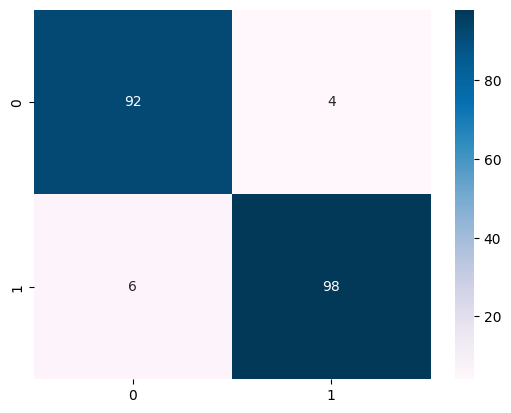

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

SVM

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}

SVM_grid = GridSearchCV(svm.SVC(), param_grid_svm, cv=5)
SVM_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']})

In [ ]:
print(SVM_grid.best_params_)

print(SVM_grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [ ]:
svm_clf = svm.SVC(C=10, gamma=0.001, kernel='rbf')
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.945


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, predicted))

from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, predicted, average='macro'))

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, predicted))

precision : 0.943
recall : 0.952
f1-score: 0.947
weighted f1-score: 0.945
0.8898242299511814
0.8955445544554456
0.8897795591182365


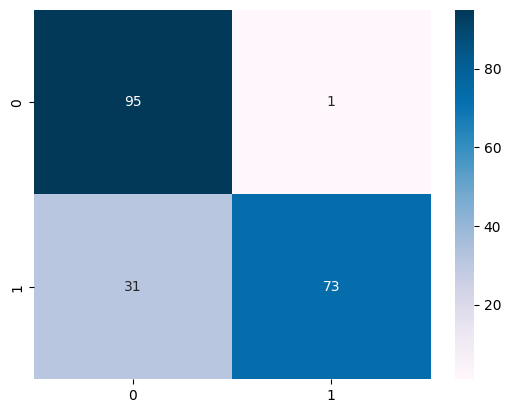

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

RANDOM FOREST

In [ ]:
param_grid_rf = {
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8]}

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv= 5)
RF_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]})

In [ ]:
print(RF_grid.best_params_)

{'max_depth': 8, 'n_estimators': 200}


In [ ]:
r_forest = RandomForestClassifier(200,max_depth=8, random_state=5)
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.890


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, predicted))

from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, predicted, average='macro'))

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, predicted))

precision : 0.880
recall : 0.913
f1-score: 0.896
weighted f1-score: 0.890
0.7799219429711378
0.8012210012210013
0.7792937399678973


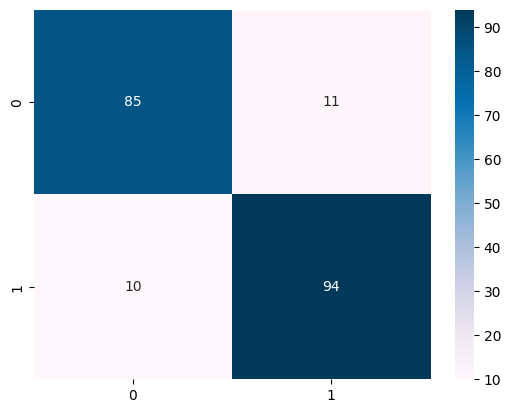

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
predicted = nb_model.predict(x_test)
score = nb_model.score(x_test, y_test)
nb_score_ = np.mean(score)

print('Accuracy : %.3f' % (nb_score_))

Accuracy : 0.835


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, predicted))

from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, predicted, average='macro'))

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, predicted))

precision : 0.814
recall : 0.885
f1-score: 0.848
weighted f1-score: 0.834
0.6710268167540547
0.7152222222222222
0.6682750301568154


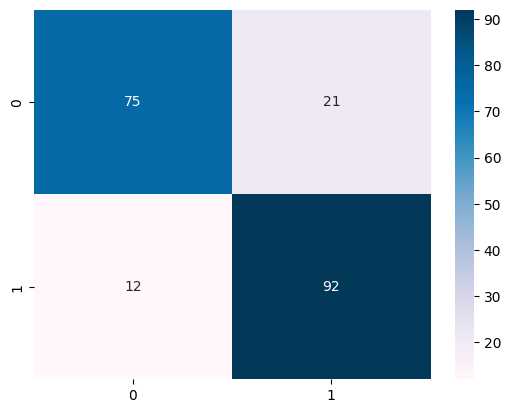

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()